# Reuters News Article Topic Classification 

François Chollet's "Deep Learning with Python", Chapter 5.

In [1]:
from tensorflow.keras.datasets import reuters

## Download and Clean Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [5]:
print(f'Train data size: {len(train_data)}')
print(f'Test data size: {len(test_data)}')

Train data size: 8982
Test data size: 2246


In [8]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [7]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 1s 2us/step


Reverse dictionary word mapping

In [9]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [11]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Translate input and outputs into one-hot encoding vectors

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

## Alternative Way of Implementing the `to_one_hot` function
```python
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

```

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

## Building the DL Model

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.9.0


In [23]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [25]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-02-27 14:27:15.314265: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-27 14:27:15.714252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 39ms/step - loss: 2.4729 - accuracy: 0.5365 - val_loss: 1.6336 - val_accuracy: 0.6490
Epoch 2/20
 1/16 [>.............................] - ETA: 0s - loss: 1.4927 - accuracy: 0.6895

2023-02-27 14:27:17.835181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.3499 - accuracy: 0.7119 - val_loss: 1.2802 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0067 - accuracy: 0.7859 - val_loss: 1.1381 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.7952 - accuracy: 0.8287 - val_loss: 1.0479 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6320 - accuracy: 0.8667 - val_loss: 0.9619 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5037 - accuracy: 0.8944 - val_loss: 0.9651 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4085 - accuracy: 0.9137 - val_loss: 0.9501 - val_accuracy: 0.8040
Epoch 8/20
16/16 [==============================] - 0s 14ms/step - loss: 0.3343 - accuracy: 0.9270 - val_loss: 0.9241 - val_accuracy: 0.8080
Epoch 9/20
16/16 [======

## Visualizing Training and Validation

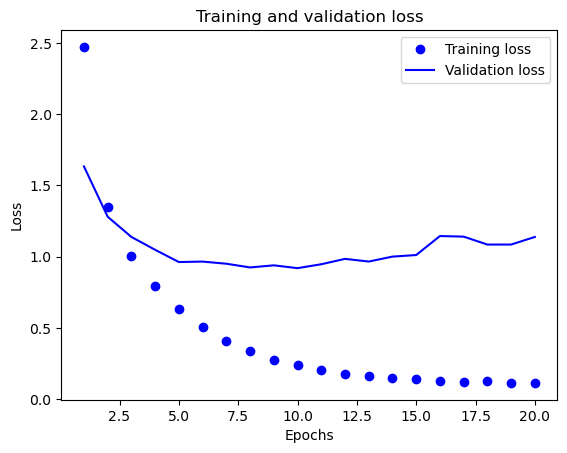

In [30]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

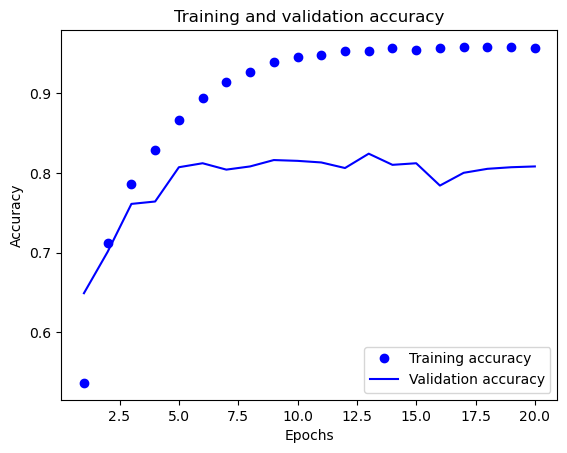

In [31]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Try to Optimize Overfitting

In [32]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
 1/16 [>.............................] - ETA: 4s - loss: 3.8108 - accuracy: 0.0469

2023-02-27 14:32:09.463994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 23ms/step - loss: 2.4544 - accuracy: 0.5427 - val_loss: 1.6302 - val_accuracy: 0.6540
Epoch 2/9
10/16 [=================>............] - ETA: 0s - loss: 1.4299 - accuracy: 0.6920

2023-02-27 14:32:09.907539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 14ms/step - loss: 1.3482 - accuracy: 0.7091 - val_loss: 1.2856 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0120 - accuracy: 0.7786 - val_loss: 1.1154 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8002 - accuracy: 0.8279 - val_loss: 1.0332 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6368 - accuracy: 0.8652 - val_loss: 0.9830 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5084 - accuracy: 0.8935 - val_loss: 0.9331 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4076 - accuracy: 0.9128 - val_loss: 0.9216 - val_accuracy: 0.8110
Epoch 8/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3347 - accuracy: 0.9290 - val_loss: 0.8970 - val_accuracy: 0.8150
Epoch 9/9
16/16 [=============

In [34]:
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 0.9953 - accuracy: 0.7796


## Evaluation and Testing

In [35]:
results

[0.9952508211135864, 0.7796081900596619]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20213713268032057

In [37]:
predictions = model.predict(x_test)

59/71 [=======================>......] - ETA: 0s

2023-02-27 14:34:45.865405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 3ms/step


In [38]:
predictions[0]

array([3.93519394e-06, 8.51463710e-07, 3.33272929e-08, 9.98466134e-01,
       1.10359874e-03, 3.84940080e-10, 3.59345026e-10, 1.02113700e-06,
       7.23825724e-05, 6.45859188e-09, 3.32845786e-07, 8.07890174e-05,
       1.37481375e-05, 1.00341026e-06, 1.78771646e-08, 3.11136716e-07,
       1.38225505e-05, 2.09904471e-07, 1.49408470e-06, 1.78631264e-04,
       2.60876095e-05, 2.51674865e-05, 4.52147759e-08, 4.96113159e-08,
       6.35040021e-09, 1.38059150e-07, 1.20883331e-10, 9.65250280e-09,
       1.68037730e-07, 5.89073238e-07, 4.02251771e-07, 6.80269281e-08,
       6.91473971e-08, 2.44591325e-09, 2.39002077e-07, 1.78343900e-08,
       2.69411180e-06, 1.06289676e-07, 5.01032353e-08, 2.98392166e-07,
       2.04214157e-08, 5.30446641e-06, 1.61641012e-09, 2.32229862e-08,
       4.37930378e-12, 1.04155767e-07], dtype=float32)

In [41]:
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

0.9999999
3


## Handling Integer Categorical Labels
```python
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
```